<a href="https://colab.research.google.com/github/kmiyasararafath/Ascendium_exercise/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Parts Audit Details

The analysis of parts audit details involves the following steps

1.   Data Collection and Exploration
2.   Data cleaning and preprocessing
3.   Feature Selection and Engineering
4.   Data Visualization   
5.   Data Splitting - to do
6.   Statistical Analysis - partly done
7.   Data Validation - to do
8.   Data Security and Privacy - to do
9.   Documentation - to do










# Data Collection and Exploration

>The dataset contains a collection of submissions. A submission involves multiple Repair Orders (ROs). Each RO might have multiple jobs. Each job have one labor and zero or many part details.

> Submissions are imported from Production DU-Auditor for a period from Jan 2023 to May 2023. Only audited data is considered here. Also, vehicle customer informations are removed from the dataset for privacy.









In [ ]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NS/Ford_Part_full_new.csv')
datatypes=df.dtypes

## Analysis of the input data
The different input fields in the submission are given below. This includes both input fields and derived fields. The rule based system uses the input data and produces some of the derived variables.

The list of input fields along with their data type is given below.






In [ ]:
print(datatypes.to_string(max_rows=None))

submission_uuid                   object
ro_id                              int64
manufacturer                      object
state_code                        object
allowed_makes                     object
disallowed_makes                  object
allowed_departments               object
disallowed_departments           float64
parts_mapper_imported             object
labor_mapper_imported             object
exclude_parts_retail_paytypes     object
exclude_labor_retail_paytypes     object
accepts_non_oem                     bool
is_job_based_outcome                bool
is_main_part_is_nonoem              bool
vehicle_year                     float64
vehicle_make                      object
vehicle_model                     object
branch                           float64
department                        object
mileage                          float64
make_outcome                      object
branch_outcome                    object
dept_outcome                      object
ro_outcome      

#Analysis

The details regarding submissions, RO's are given below.

## Manufacturer Involved

In [ ]:
Manufacturers_involved=df['manufacturer'].unique()
print(f'Manufacturers involved: {Manufacturers_involved}')

Manufacturers involved: ['FORD']


##Submission, RO details

In [ ]:
#Number of submissions
No_of_submissions=df['submission_uuid'].nunique()
No_of_ROs=df['ro_id'].nunique()
print(f'Number of submissions: {No_of_submissions}')
print(f'Number of ROs: {No_of_ROs}')

Number of submissions: 49
Number of ROs: 5646


## State-wise distribution of submissions

In [ ]:
df_state_brand=df[['submission_uuid','state_code','manufacturer']]
df_state_brand=df_state_brand.drop_duplicates()
df_state_brand=df_state_brand.reset_index(drop=True)
# df_state_brand
state_submissions=df_state_brand['state_code'].value_counts()
temp_df=pd.DataFrame(state_submissions)
temp_df

,state_code
UT,7
TX,5
LA,4
WI,4
OK,3
SC,3
OH,3
IN,2
WV,2
AL,2


In [ ]:
fig1 = make_subplots(
    rows=1, cols=1,
    # subplot_titles=('# of submissions state-wise',)
)
fig1.add_trace(go.Histogram(x=df_state_brand['state_code']))
fig1.update_layout(height=500, width=1000,
                   title='No. of submissions state-wise',
                   font=dict(size=24  # Increase the font size
                             ),
                   xaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of x-axis values
                       ),
                   yaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of y-axis values
                       ))
fig1.update_traces(textfont_size=20)
fig1.show()

# Data cleaning and preprocessing


## Cleaning of input data
There are some identifier fields in the database, which are useful for us for getting inferences but might not be required as input for machine learning. So such fields are removed after their use.



In [ ]:
columns_to_delete=['submission_uuid','ro_id','job_id','job_id.1','job_number','job_number.1']
df_cleaned=df.copy()
cols=df_cleaned.columns
for col in columns_to_delete:
    if col in cols:
        df_cleaned=df_cleaned.drop(col,axis=1)
cols=df_cleaned.columns
print(f"Number of columns before removing columns:{len(df.columns)}")
print(f"Number of columns after removing columns:{len(cols)}")

Number of columns before removing columns:72
Number of columns after removing columns:66


## Data preprocessing
> The following input fields
*'allowed_makes', 'disallowed_makes', 'vehicle_make',*
*'allowed_departments','disallowed_departments', 'department'*
*'vehicle_model', 'branch'* have been removed and the inputs are preprocessed already in the DB with rule based system to the fields *'make_outcome', 'branch_outcome', 'dept_outcome'*

> Currently, we are doing an analysis of part audit based on the part details. So we are removing the labor details available in the data.

> Currently, we are not performing LLM based string processing, So we are removing description columns.



In [ ]:
columns_to_delete=['allowed_makes','disallowed_makes','allowed_departments', 'disallowed_departments','branch', 'department','vehicle_make', 'labor_description',
                   'labor_pay_type', 'labor_hours', 'labor_sale', 'labor_paytype_category','labor_final_sale', 'labor_mapper_outcome', 'labor_mapper_category',
                   'labor_is_statutory_exclusion', 'labor_mapper_category_outcome','labor_original_outcome', 'labor_final_outcome','exclude_labor_retail_paytypes',
                   'labor_mapper_imported','job_description', 'complaint','job_outcome','job_derived_paytype','parts_description','parts_override', 'parts_override_reason',
                   'job_override','job_override_reason','vehicle_model']

cols=df_cleaned.columns
print(f"Number of columns before removing columns:{len(cols)}")
for col in columns_to_delete:
    if col in cols:
        df_cleaned=df_cleaned.drop(col,axis=1)
cols=df_cleaned.columns

print(f"Number of columns after removing columns:{len(cols)}")

Number of columns before removing columns:35
Number of columns after removing columns:34


##Preprocessing
Checking the data see the amount of null columns in each column

In [ ]:
df_cleaned.isnull().sum()

manufacturer                         0
state_code                           0
parts_mapper_imported                0
exclude_parts_retail_paytypes    11259
accepts_non_oem                      0
is_job_based_outcome                 0
is_main_part_is_nonoem               0
vehicle_year                      1909
mileage                           1130
make_outcome                         0
branch_outcome                       0
dept_outcome                         0
ro_outcome                           0
job_paytype_outcome                  0
job_is_main_part_non_oem             0
job_outcome                          0
parts_pay_type                       0
parts_quantity                       0
parts_unit_cost                      0
parts_unit_sale                      0
parts_ext_cost                       0
parts_ext_sale                       0
parts_core_charge_cost           19037
parts_core_charge_sale           19037
parts_core_return_cost           29879
parts_core_return_sale   

Here, it can be seen that many of the columns has empty cells. Here there are three cases.


1. Those data which are null for a reason.
> For eg: 'parts_mapper_category_outcome' has been kept as empty in some cases.
For those cases we are filling the empty cells with 'NULL' text.
> Similarly in someother cases these are filled 'NULL'
2. There are some cells which are left blank due to unavailability of data.
>We can replace the empty cells with some values which are acceptable as per the system.
3. Data which are unavoidable and cannot be filled.
>We have to remove those rows, if data is important.



In [ ]:
columns_to_fillnull=['parts_mapper_outcome','parts_mapper_category','parts_mapper_category_outcome','parts_original_outcome']
for column in columns_to_fillnull:
    df_cleaned[column].fillna('NULL',inplace=True)
df_cleaned['parts_is_oem'].fillna(True,inplace=True)


for feature in ['parts_is_statutory_exclusion','parts_is_standalone']:
    df_cleaned[feature].fillna(False,inplace=True)
df_cleaned['vehicle_year'].fillna(1900,inplace=True) # Assumptions taken
for feature in ['parts_core_charge_cost','parts_core_charge_sale', 'parts_core_return_cost','parts_core_return_sale','mileage']:
    df_cleaned[feature].fillna(0,inplace=True)

columns_to_dropna=['parts_mapper_imported', 'accepts_non_oem', 'is_job_based_outcome','is_main_part_is_nonoem',
       'job_paytype_outcome','job_is_main_part_non_oem', 'parts_paytype_category']

df_cleaned.dropna(subset=columns_to_dropna,inplace=True)

##Feature Engineering
Feature engineering is the process of creating new features.

In our case, we have already created a rule based system which performs most of the feature engineering.

In addition, we are adding some feature changes in the preprocessing stage itself.

>The 'parts_mapper_imported' field shows the date and time which are not relevant for machine learning. So we are using this field for finding whether mapper import has been performed or not. So converting the same as binary field.

> Similarly we are converting 'parts_kit_name' to binary

> 'exclude_parts_retail_paytypes' shows the paytypes which are excluded. So we compare the parts_paytype field to check whether paytype is exclude or not.
We introduce a input field called 'is_excluded_pay_type' instead of the above input fields.





In [ ]:
#converting mapper imported time to binary fields
df_cleaned['parts_mapper_imported']=~pd.isnull(df_cleaned['parts_mapper_imported'])
#converting kit name to binary field
df_cleaned['parts_kit_name'] = ~pd.isnull(df_cleaned['parts_kit_name'])

# checking whether labor_pay_type is in excluded labor retail paytypes
is_excluded_pay_type=[]
for index, row in df_cleaned.iterrows():
    a=row['exclude_parts_retail_paytypes']
    a=str(a)
    if not a:
        a=[]
        # print(index)
    else:
        # print(index)
        a=a.replace('{','')
        a=a.replace('}','')
        a=a.split(',')
    b=row['parts_pay_type']
    if(b in a):
        is_excluded_pay_type.append(True)
    else:
        is_excluded_pay_type.append(False)

# creating a new field for storing output
df_cleaned['is_excluded_pay_type']=is_excluded_pay_type
# removing the labor_pay_type and exclude_labor_retail_paytypes fields
df_cleaned=df_cleaned.drop('exclude_parts_retail_paytypes',axis=1)
df_cleaned=df_cleaned.drop('parts_pay_type',axis=1)



In [ ]:
df_cleaned.isnull().sum()

manufacturer                     0
state_code                       0
parts_mapper_imported            0
accepts_non_oem                  0
is_job_based_outcome             0
is_main_part_is_nonoem           0
vehicle_year                     0
mileage                          0
make_outcome                     0
branch_outcome                   0
dept_outcome                     0
ro_outcome                       0
job_paytype_outcome              0
job_is_main_part_non_oem         0
job_outcome                      0
parts_quantity                   0
parts_unit_cost                  0
parts_unit_sale                  0
parts_ext_cost                   0
parts_ext_sale                   0
parts_core_charge_cost           0
parts_core_charge_sale           0
parts_core_return_cost           0
parts_core_return_sale           0
parts_kit_name                   0
parts_paytype_category           0
parts_mapper_outcome             0
parts_mapper_category            0
parts_is_oem        

##Preprocessing
The output variable is a categorical variable named 'Include'/'Exclude'. We are converting it to a binary values of 0,1.

In [ ]:
# converting output variable to numerical 0,1
df_cleaned['parts_final_outcome']=(df_cleaned['parts_final_outcome']=='Include')
df_cleaned['parts_final_outcome']=list(map(int,df_cleaned['parts_final_outcome']))

## Preprocessing
Removing of duplicate rows.

In [ ]:
print(f'Number of rows before removing duplicates: {len(df_cleaned)}')
df_cleaned=df_cleaned.drop_duplicates()
print(f'Number of rows after removing duplicates: {len(df_cleaned)}')

Number of rows before removing duplicates: 32128
Number of rows after removing duplicates: 31322


In [ ]:
categorical_variables=['manufacturer', 'state_code', 'parts_mapper_imported',
                       'accepts_non_oem', 'is_job_based_outcome','is_main_part_is_nonoem',
                       'make_outcome', 'branch_outcome','dept_outcome', 'ro_outcome',
                       'job_paytype_outcome','job_is_main_part_non_oem','parts_paytype_category',
                       'parts_mapper_outcome','parts_mapper_category', 'parts_is_statutory_exclusion',
                       'parts_mapper_category_outcome','is_excluded_pay_type','parts_is_oem',
                       'parts_is_standalone', 'parts_kit_name','parts_original_outcome']

numerical_variables=['vehicle_year', 'mileage','parts_quantity','parts_unit_cost','parts_unit_sale','parts_ext_cost','parts_ext_sale','parts_core_charge_cost','parts_core_charge_sale','parts_core_return_cost','parts_core_return_sale']
output_variable=['parts_final_outcome']

In [ ]:
len(categorical_variables)+len(numerical_variables)+len(output_variable)

34

In [ ]:
len(df_cleaned.columns)

34

# Feature engineering
Feature engineering is the process of creating new features.
>In our case, we have already created a rule based system which performs most of the feature engineering.

>In addition, we have added some feature changes in the preprocessing stage itself.

##Feature Selection

Here we are analyzing the features by fitting the features into a decision tree. In order to avoid over-fitting, we are choosing a max_depth of 3  for the decision trees.

In [ ]:
features = numerical_variables.copy()
features.extend(categorical_variables)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score,classification_report
accuracy=[]
f1=[]
precision=[]
recall=[]
for feature in features:
    # print(feature)
    if feature in categorical_variables:
        df_encoded= pd.get_dummies(df_cleaned[feature], columns=feature, prefix=feature)
    else:
        df_encoded=df_cleaned[feature]
    df_encoded=pd.concat([df_encoded,df_cleaned['parts_final_outcome']],axis=1)
    cols=list(df_encoded.columns)
    cols.remove('parts_final_outcome')
    train_dict=df_encoded[cols].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    dv.fit(train_dict)
    # print(dv.get_feature_names_out())
    X_train=dv.transform(train_dict)
    y_train=df_encoded['parts_final_outcome']

    ##### Decision Tree
    dt = DecisionTreeClassifier(max_depth=5)
    dt.fit(X_train, y_train)
    preds = dt.predict(X_train)
    p = precision_score(y_train, preds)
    # print('Precision: %.4f' % precision)
    acc = accuracy_score(y_train, preds)
    # print("Accuracy: %.4f" % accuracy)
    r = recall_score(y_train, preds)
    # print("Recall: %.4f" % recall)
    f = f1_score(y_train, preds)
    # print("F1-score: %.4f" % f1)
    accuracy.append(acc)
    f1.append(f)
    precision.append(p)
    recall.append(r)


In [ ]:
result=pd.DataFrame()
result['feature']=features
result['precision']=precision
result['recall']=recall
result['accuracy']=accuracy
result['f1_score']=f1
result_sorted=result.sort_values(by=['accuracy'],ascending=False)
result_sorted.reset_index(drop=True).head(10)

,feature,precision,recall,accuracy,f1_score
0,parts_original_outcome,0.808953,0.988836,0.872645,0.889895
1,parts_mapper_outcome,0.772920,0.848117,0.791265,0.808774
2,parts_mapper_category_outcome,0.756438,0.846829,0.778367,0.799085
3,parts_mapper_category,0.708731,0.878849,0.748962,0.784676
4,parts_is_oem,0.576899,0.997240,0.617904,0.730947
5,parts_paytype_category,0.574601,1.000000,0.614680,0.729837
6,parts_unit_cost,0.616124,0.684456,0.613818,0.648495
7,job_paytype_outcome,0.570559,1.000000,0.608263,0.726568
8,parts_unit_sale,0.609751,0.676665,0.606315,0.641468
9,parts_ext_cost,0.587378,0.815851,0.605868,0.683015


In [ ]:
sum(y_train)/len(y_train)

0.5204648489879318

# Data Visualization

The

In [ ]:
%matplotlib inline

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import cv2


fig = make_subplots(
    rows=9, cols=2,
    specs=[[{},{}],
           [{},{}],
           [{'colspan':2},None],
           [{},{}],
           [{},{}],
           [{},{}],
           [{},{}],
           [{},{}],
           [{},{}],
           ],

    subplot_titles=("Parts_original_outcome","Parts_mapper_outcome",
                    "parts_mapper_category_outcome", "parts_is_oem",
                    "parts_mapper_category",
                    "parts_paytype_category","job_paytype_outcome ",
                    "parts_unit_sale","parts_unit_cost",
                    "parts_ext_sale","job_is_main_part_non_oem",
                    "parts_ext_cost","parts_is_statutory_exclusion",
                    "parts_is_standalone", "parts_kit_name",
                    "parts_quantity",
                    ))

# fig.add_trace(go.Bar(
#         x=data['Manufacturer'],
#         y=data['submission_Count'],
#         ), row=1, col=1)

# fig.add_trace(go.Bar(
#         x=data['Manufacturer'],
#         y=data['ro_id_Count'],
#         ), row=1, col=2)
color=['red','green']
# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_original_outcome'], df_cleaned['parts_final_outcome'])

# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=1, col=1)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_mapper_outcome'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=1, col=2)


# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_mapper_category_outcome'], df_cleaned['parts_final_outcome'])

# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column
        ), row=2, col=1)
# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_is_oem'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=2, col=2)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_mapper_category'], df_cleaned['parts_final_outcome'])
for i,index in enumerate(cross_tab.index):
    row=cross_tab.loc[index]
    # print(row)
    # print(sum(row))
    cross_tab.loc[index]=row/sum(row)
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=3, col=1)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_paytype_category'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=4, col=1)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['job_paytype_outcome'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=4, col=2)

# Create the violin plot
for i,category in enumerate(['Exclude','Include']):
    data1=df_cleaned[df_cleaned['parts_final_outcome']==i]['parts_unit_sale']
    fig.add_trace(go.Violin(y=data1.values, name=category,
                            marker=dict(color=color[i]),),
                            row=5,col=1)

# Create the violin plot
for i,category in enumerate(['Exclude','Include']):
    data1=df_cleaned[df_cleaned['parts_final_outcome']==i]['parts_unit_cost']
    fig.add_trace(go.Violin(y=data1.values, name=category,
                            marker=dict(color=color[i]),),
                            row=5,col=2)

# Create the violin plot
for i,category in enumerate(['Exclude','Include']):
    data1=df_cleaned[df_cleaned['parts_final_outcome']==i]['parts_ext_sale']
    fig.add_trace(go.Violin(y=data1.values, name=category,
                            marker=dict(color=color[i]),),
                            row=6,col=1)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['job_is_main_part_non_oem'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=6, col=2)

# Create the violin plot
for i,category in enumerate(['Exclude','Include']):
    data1=df_cleaned[df_cleaned['parts_final_outcome']==i]['parts_ext_cost']
    fig.add_trace(go.Box(y=data1.values, name=category,
                            marker=dict(color=color[i]),),
                            row=7,col=1)
# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_is_statutory_exclusion'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=7, col=2)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_is_standalone'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=8, col=1)

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_cleaned['parts_kit_name'], df_cleaned['parts_final_outcome'])
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column), row=8, col=2)

# Create the violin plot
for i,category in enumerate(['Exclude','Include']):
    data1=df_cleaned[df_cleaned['parts_final_outcome']==i]['parts_quantity']
    fig.add_trace(go.Violin(y=data1.values, name=category,
                            marker=dict(color=color[i]),),
                            row=9,col=1)


# fig.update_traces(textposition='inside')
fig.update_layout(height=4000, width=1000,
                  title_text="Details of part audit features using intial 26 submissions taken")
fig.update_layout(showlegend=False)
# plot(fig)
fig.show()


# Some speical inferences

In [ ]:
df=df.drop_duplicates()

In [ ]:
df

,403 FORBIDDEN


#Influence of Sale Amount to Become a Part (Included or Excluded):
##Parts unit cost:

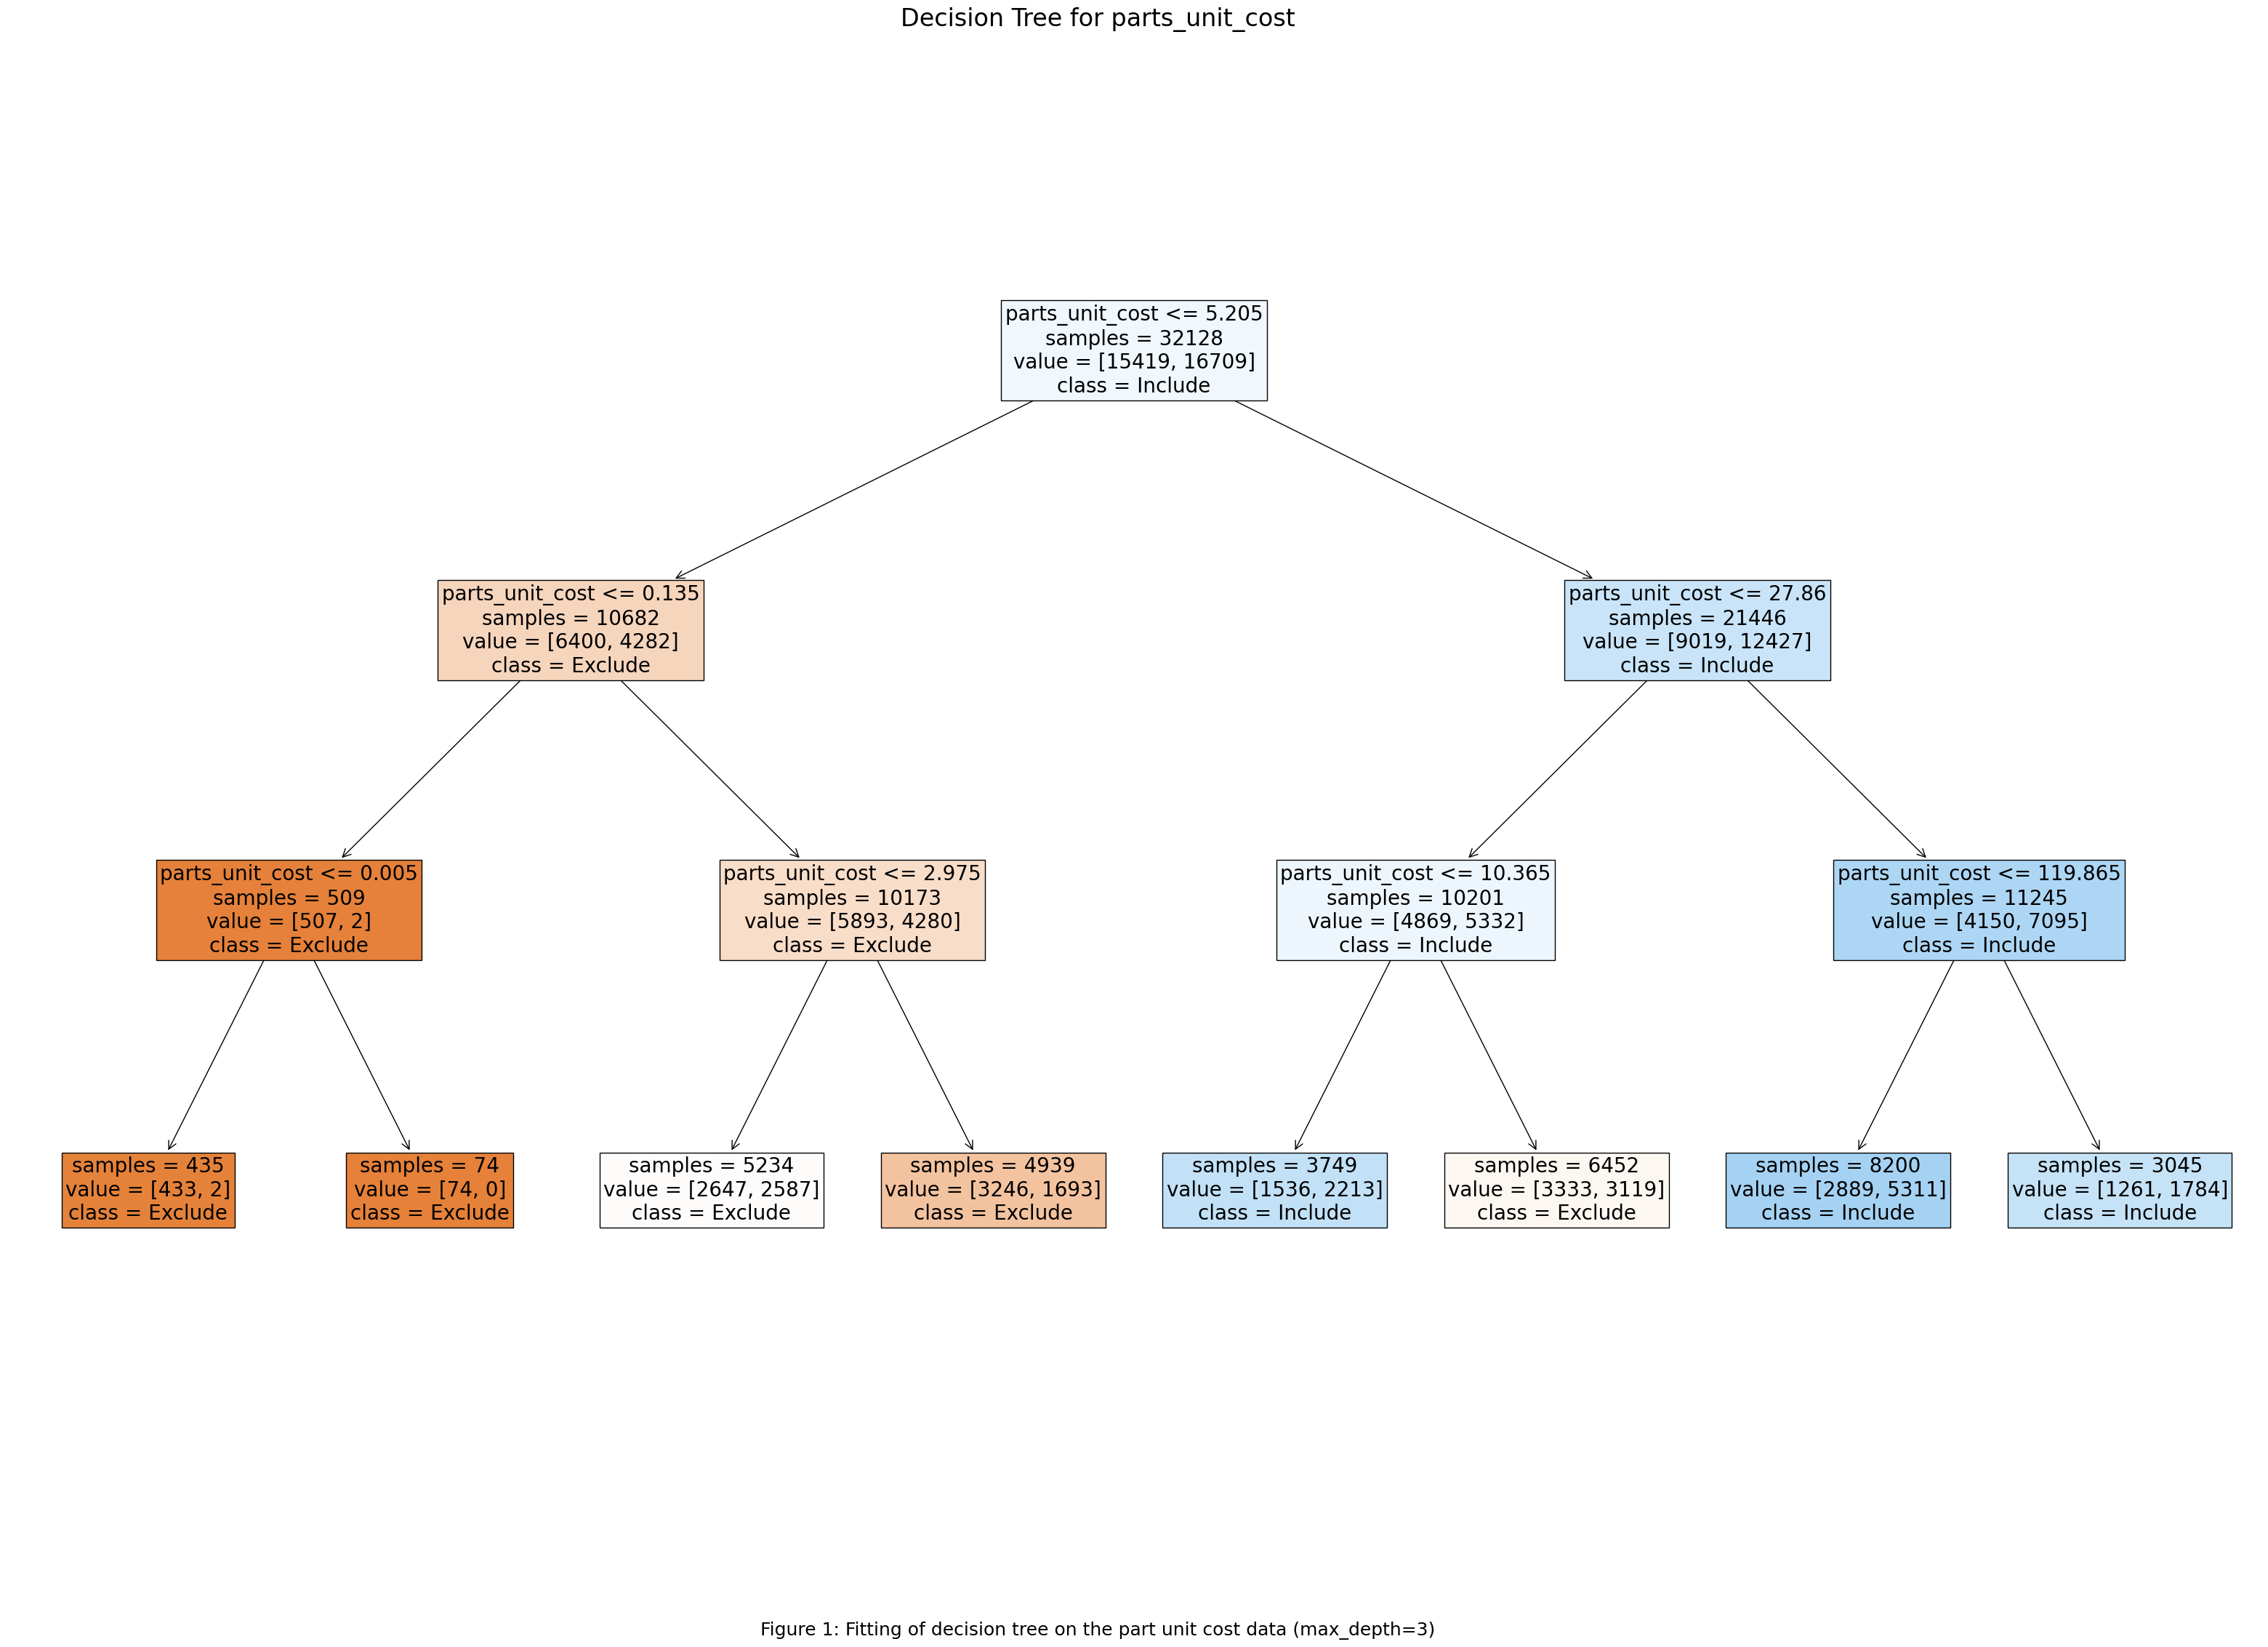

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
accuracy = []
f1 = []
precision = []
recall = []
features = ['parts_unit_cost']
for feature in features:
    df_encoded = pd.concat([df[feature], df['parts_final_outcome']], axis=1)
    cols = list(df_encoded.columns)
    cols.remove('parts_final_outcome')
    train_dict = df_encoded[cols].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    y_train = df_encoded['parts_final_outcome']
    y_train = (y_train == 'Include')
    y_train = list(map(int, y_train))
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train, y_train)
    preds = dt.predict(X_train)
    p = precision_score(y_train, preds)
    acc = accuracy_score(y_train, preds)
    r = recall_score(y_train, preds)
    f = f1_score(y_train, preds)
    accuracy.append(acc)
    f1.append(f)
    precision.append(p)
    recall.append(r)

    fig = plt.figure(figsize=(40, 20))
    _ = tree.plot_tree(dt, fontsize=20,
                       feature_names=dv.get_feature_names_out(),
                       class_names=['Exclude', 'Include'],
                       impurity=False,
                       filled=True)
    plt.suptitle('Decision Tree for ' + feature, fontsize=24, y=1.02)  # Title above the plot
    # plt.title('Observation: Parts with a unit cost greater than or equal to $27.86 were included', fontsize=18, y=1.1)  # Title below the plot
    plt.axis('off')
    plt.text(0.5, -0.1, 'Figure 1: Fitting of decision tree on the part unit cost data (max_depth=3)', fontsize=18, ha='center', transform=fig.transFigure)  # Title at the bottom
    plt.show()


###Observation: Parts with a unit cost greater than or equal to $27.86 were included

##Parts unit sale:

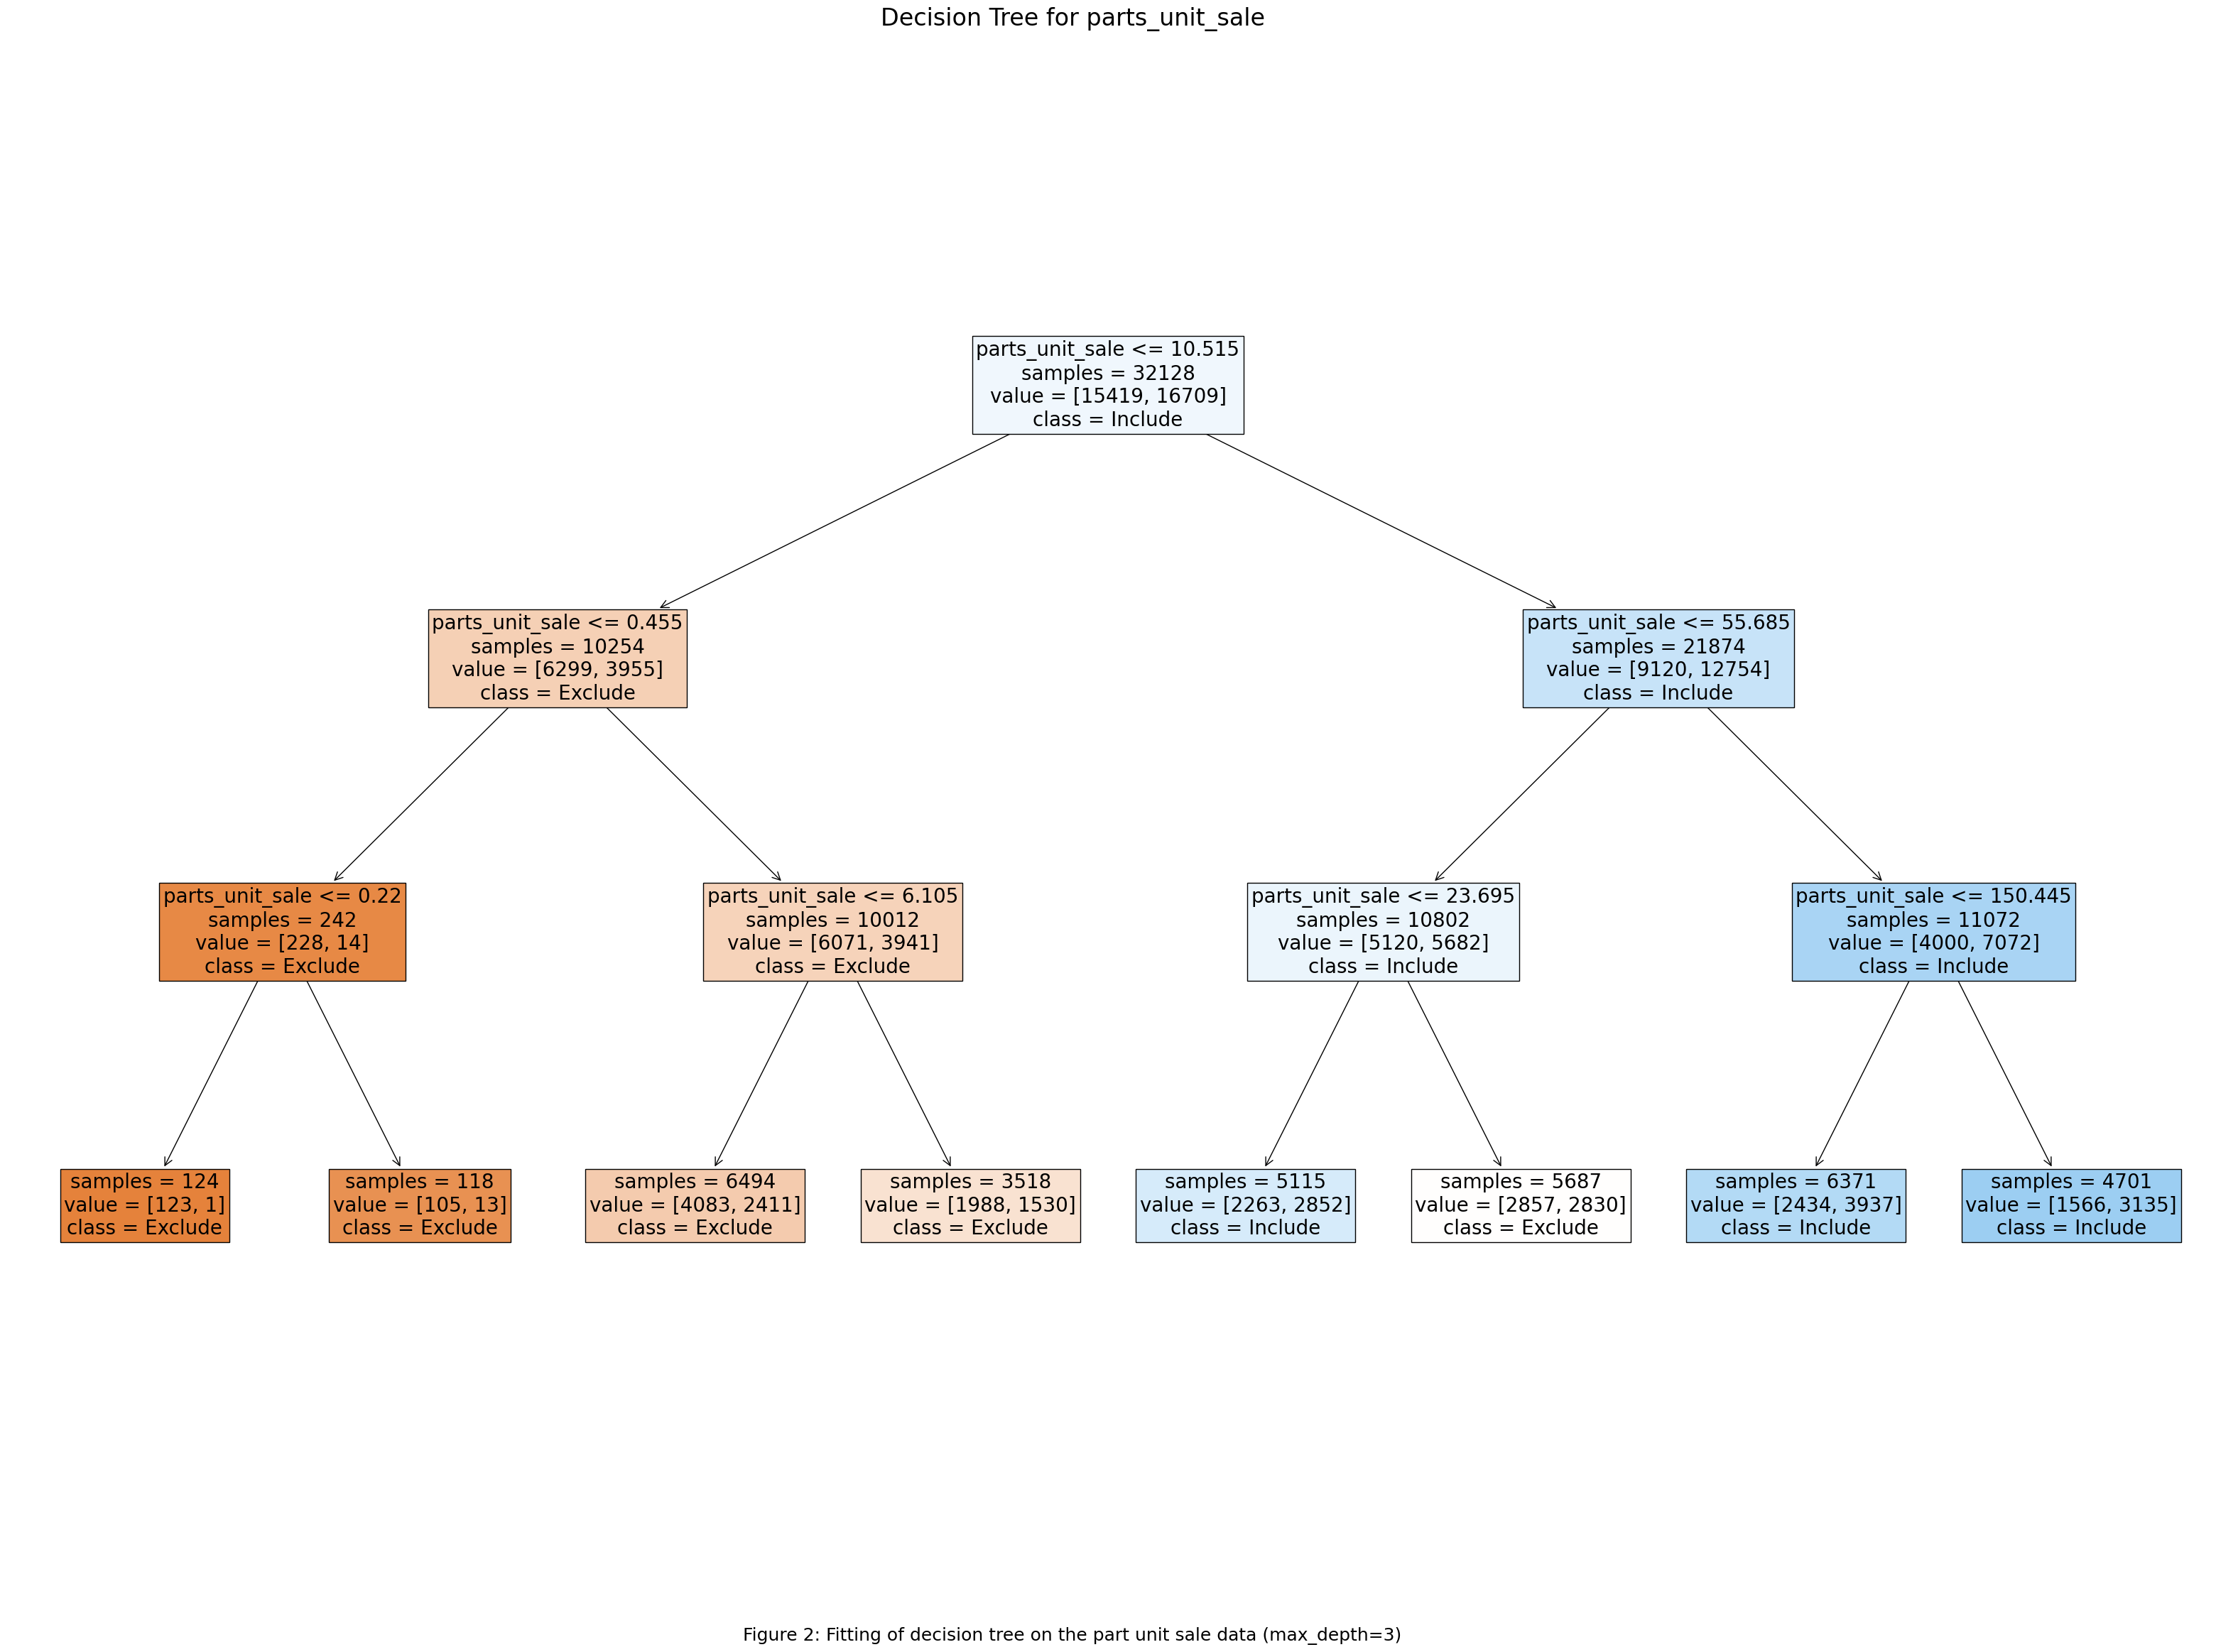

In [ ]:
features = ['parts_unit_sale']
for feature in features:
    df_encoded = pd.concat([df[feature], df['parts_final_outcome']], axis=1)
    cols = list(df_encoded.columns)
    cols.remove('parts_final_outcome')
    train_dict = df_encoded[cols].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    y_train = df_encoded['parts_final_outcome']
    y_train = (y_train == 'Include')
    y_train = list(map(int, y_train))
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train, y_train)
    preds = dt.predict(X_train)
    p = precision_score(y_train, preds)
    acc = accuracy_score(y_train, preds)
    r = recall_score(y_train, preds)
    f = f1_score(y_train, preds)
    accuracy.append(acc)
    f1.append(f)
    precision.append(p)
    recall.append(r)

    fig = plt.figure(figsize=(40, 20))
    _ = tree.plot_tree(dt, fontsize=20,
                       feature_names=dv.get_feature_names_out(),
                       class_names=['Exclude', 'Include'],
                       impurity=False,
                       filled=True)
    plt.suptitle('Decision Tree for ' + feature, fontsize=24, y=1.05)  # Title above the plot
    # plt.title('Observation: Parts with a unit sale amount greater than or equal to $55.685 are included', fontsize=18, y=1.1)  # Title below the plot
    plt.axis('off')
    plt.text(0.5, -0.1, 'Figure 2: Fitting of decision tree on the part unit sale data (max_depth=3)', fontsize=18, ha='center', transform=fig.transFigure)  # Title at the bottom
    plt.show()

###Observation: Parts with a unit sale amount greater than or equal to $55.685 are included

##Parts ext sale:

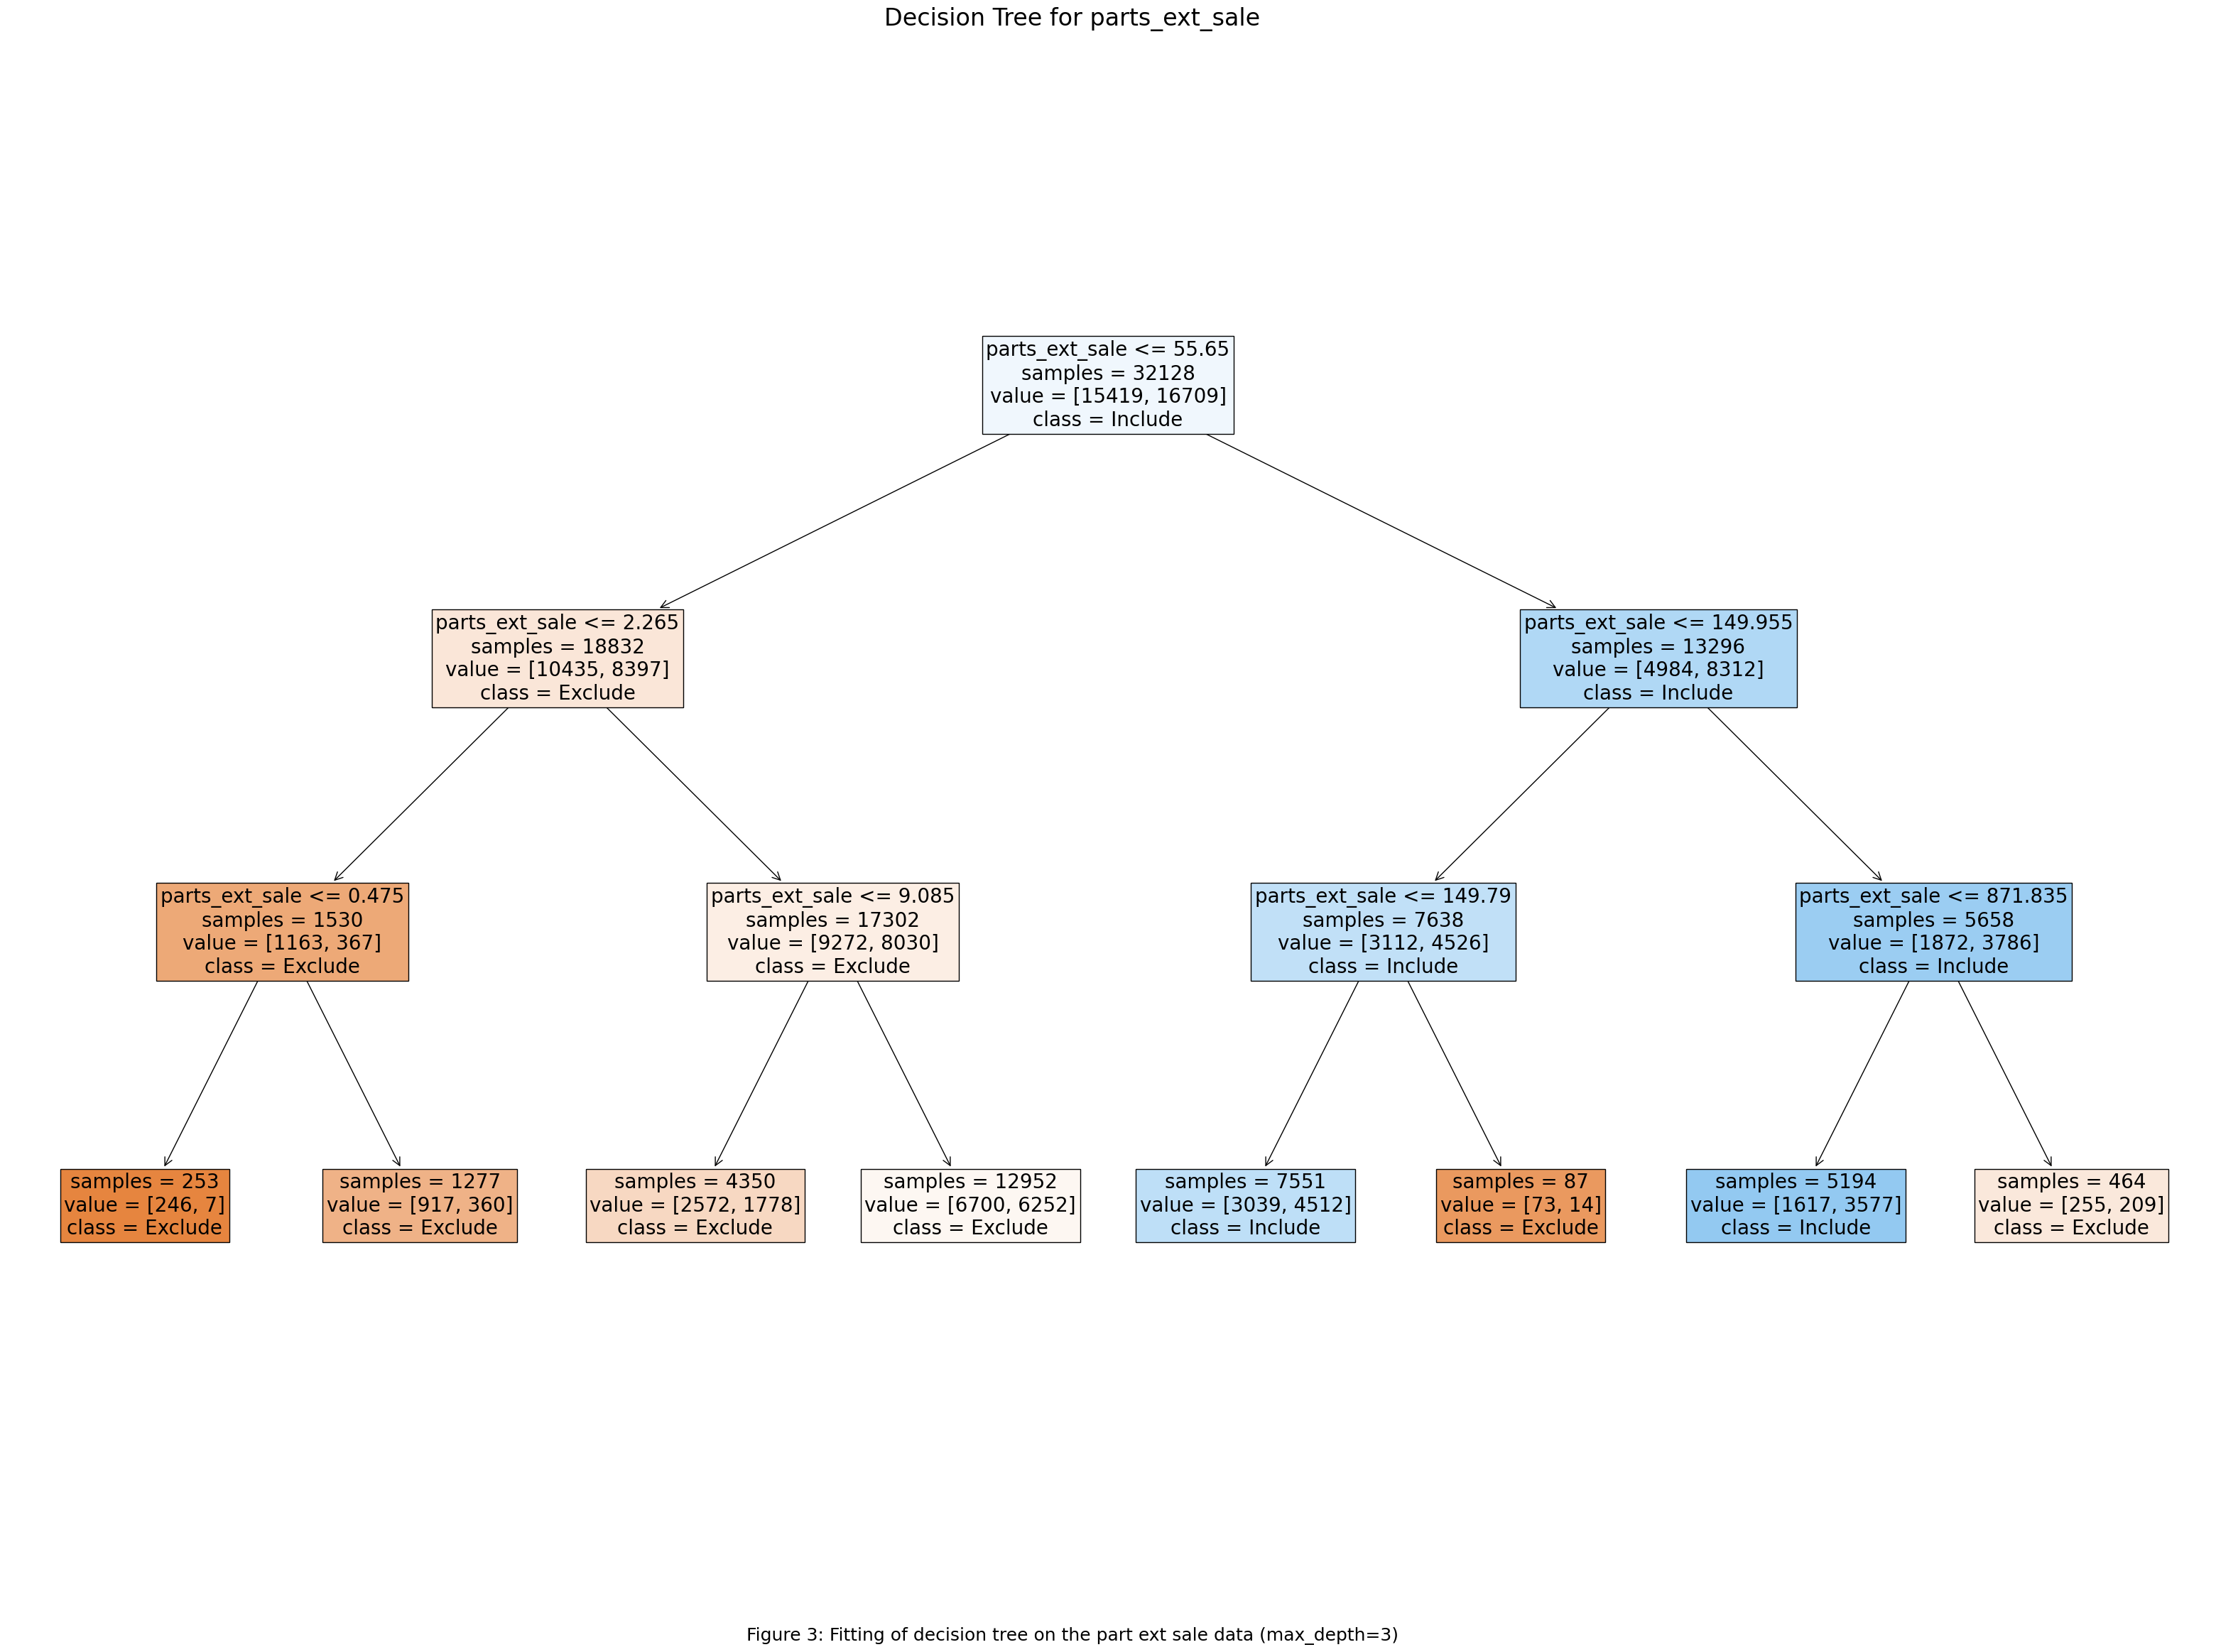

In [ ]:
features = ['parts_ext_sale']
for feature in features:
    df_encoded = pd.concat([df[feature], df['parts_final_outcome']], axis=1)
    cols = list(df_encoded.columns)
    cols.remove('parts_final_outcome')
    train_dict = df_encoded[cols].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    y_train = df_encoded['parts_final_outcome']
    y_train = (y_train == 'Include')
    y_train = list(map(int, y_train))
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train, y_train)
    preds = dt.predict(X_train)
    p = precision_score(y_train, preds)
    acc = accuracy_score(y_train, preds)
    r = recall_score(y_train, preds)
    f = f1_score(y_train, preds)
    accuracy.append(acc)
    f1.append(f)
    precision.append(p)
    recall.append(r)

    fig = plt.figure(figsize=(40, 20))
    _ = tree.plot_tree(dt, fontsize=20,
                       feature_names=dv.get_feature_names_out(),
                       class_names=['Exclude', 'Include'],
                       impurity=False,
                       filled=True)
    plt.suptitle('Decision Tree for ' + feature, fontsize=24, y=1.05)  # Title above the plot
    # plt.title('Observation: Parts ext sale less than $55.65 are mostly excluded', fontsize=18, y=1.1)  # Title below the plot
    plt.axis('off')
    plt.text(0.5, -0.1, 'Figure 3: Fitting of decision tree on the part ext sale data (max_depth=3)', fontsize=18, ha='center', transform=fig.transFigure)  # Title at the bottom
    plt.show()

###Observation: Parts ext sale less than $55.65 are mostly excluded

##Parts ext cost:

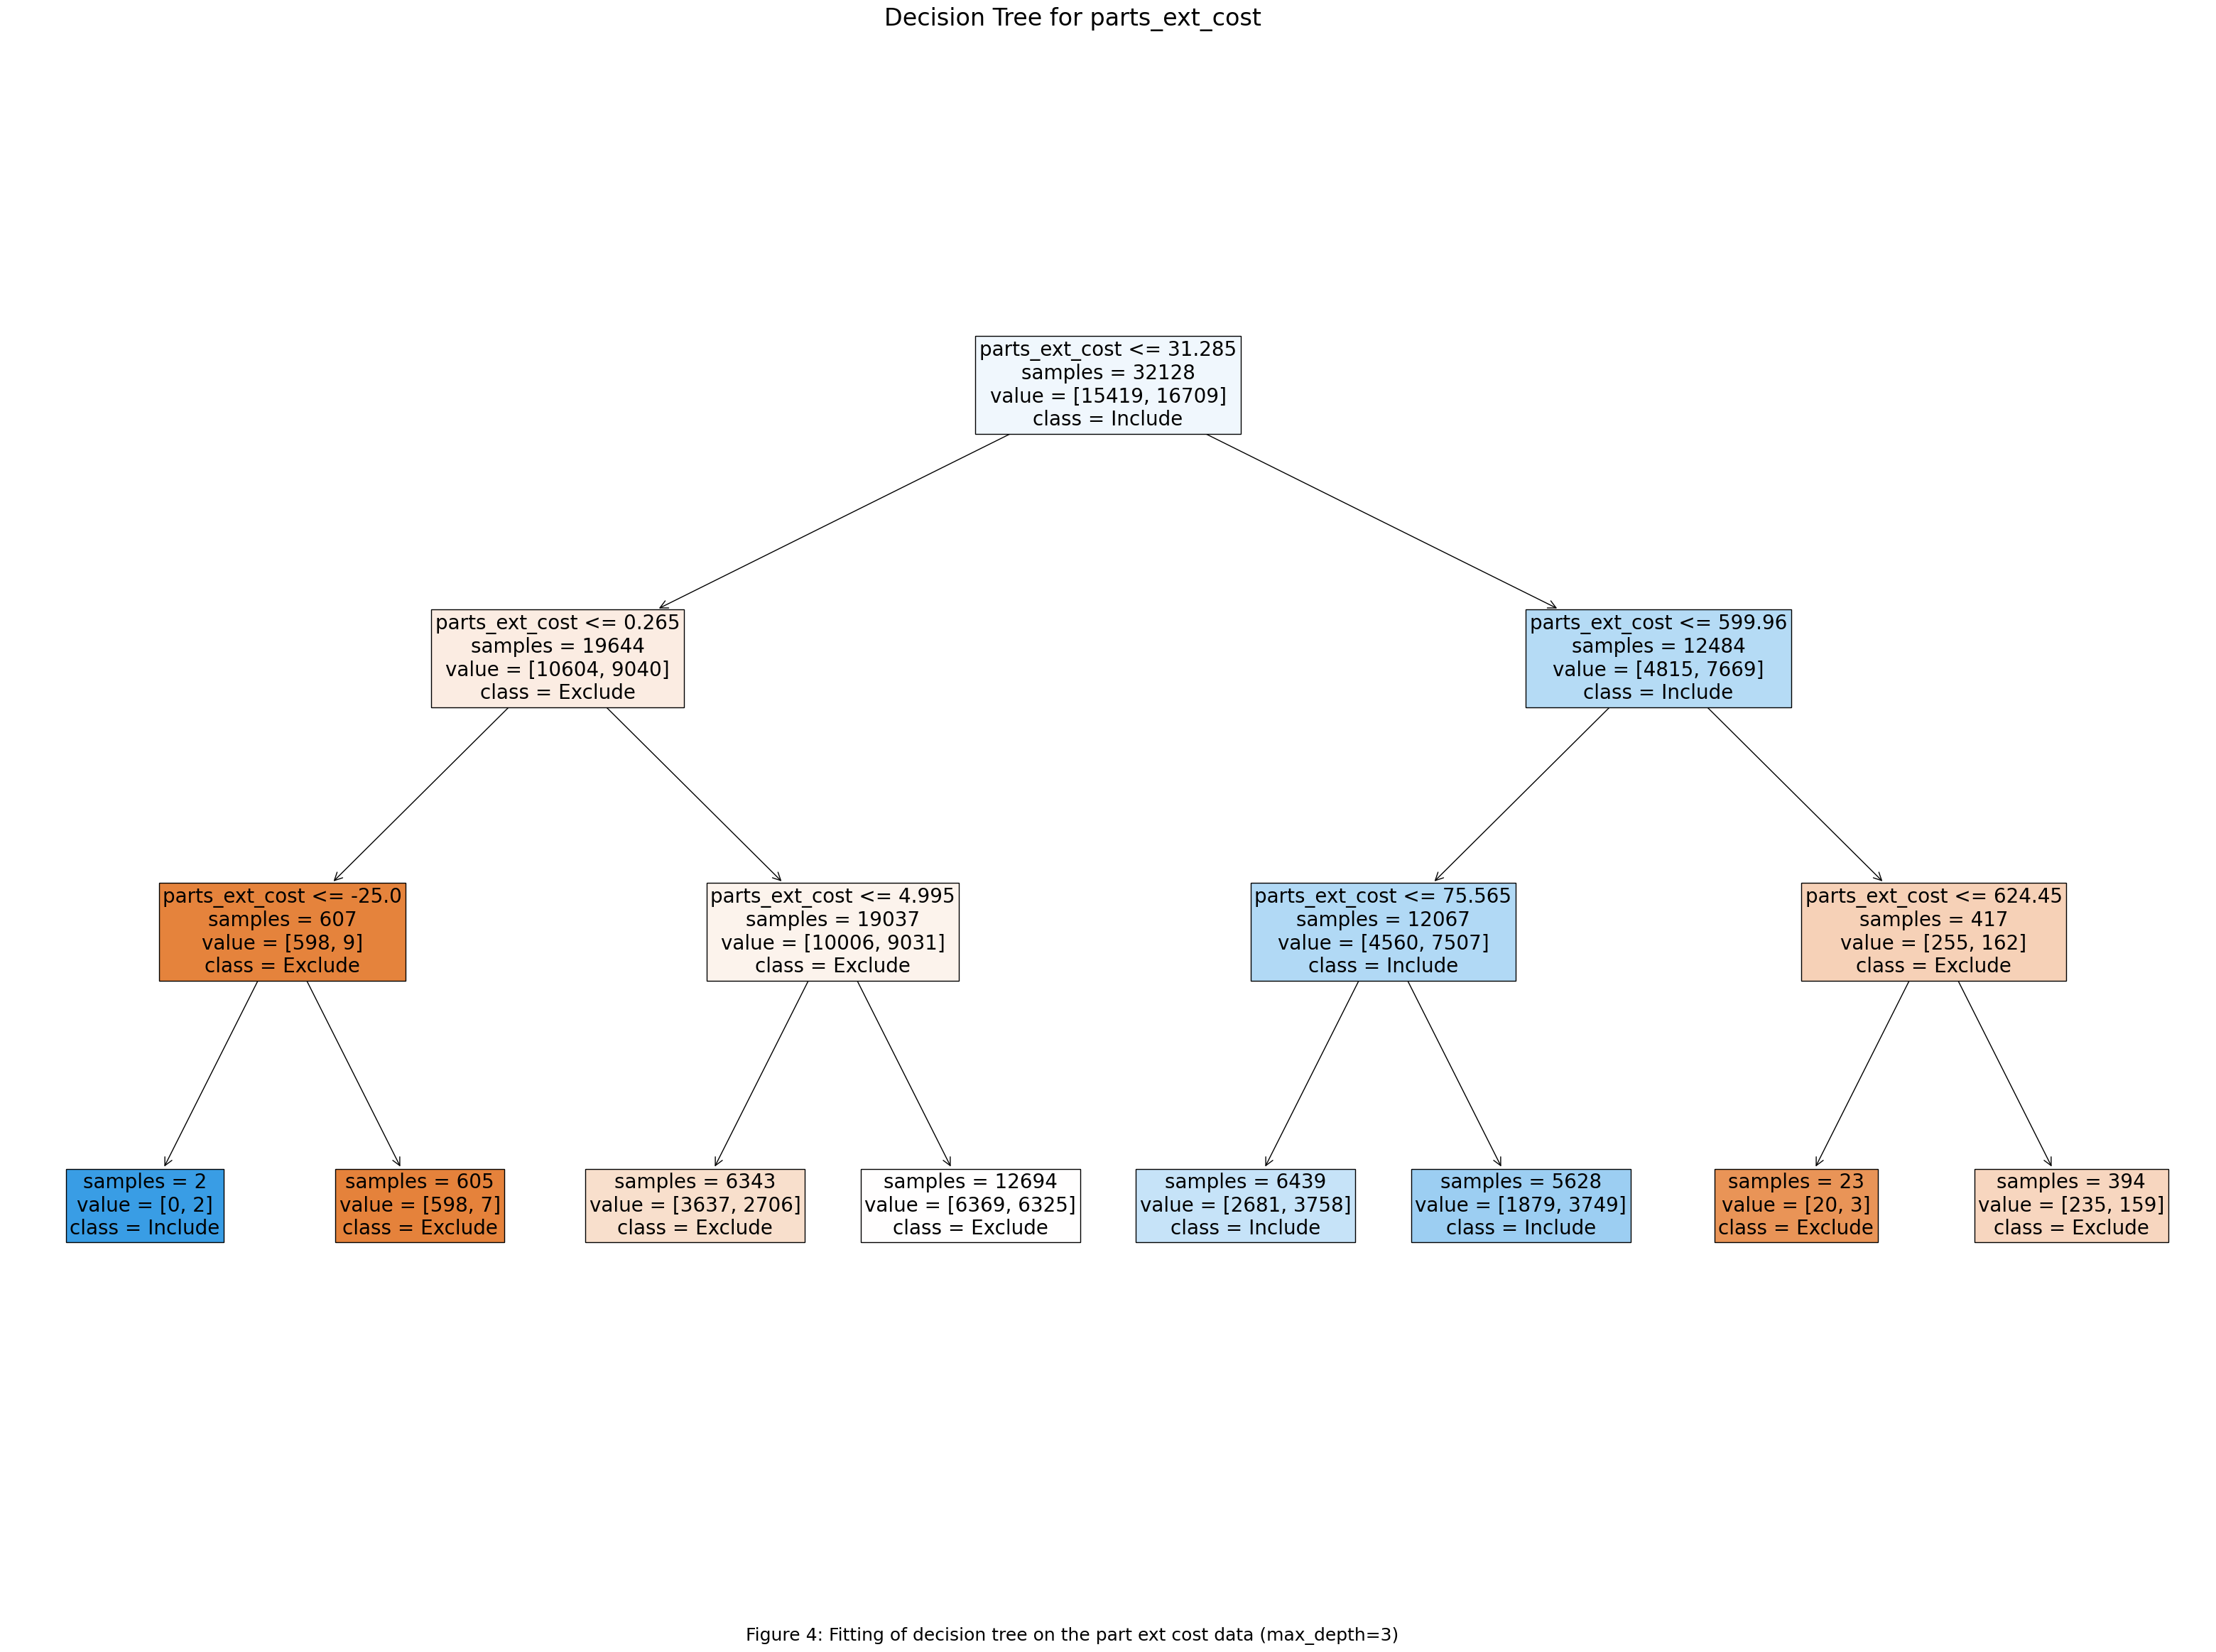

In [ ]:
features = ['parts_ext_cost']
for feature in features:
    df_encoded = pd.concat([df[feature], df['parts_final_outcome']], axis=1)
    cols = list(df_encoded.columns)
    cols.remove('parts_final_outcome')
    train_dict = df_encoded[cols].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    y_train = df_encoded['parts_final_outcome']
    y_train = (y_train == 'Include')
    y_train = list(map(int, y_train))
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train, y_train)
    preds = dt.predict(X_train)
    p = precision_score(y_train, preds)
    acc = accuracy_score(y_train, preds)
    r = recall_score(y_train, preds)
    f = f1_score(y_train, preds)
    accuracy.append(acc)
    f1.append(f)
    precision.append(p)
    recall.append(r)

    fig = plt.figure(figsize=(40, 20))
    _ = tree.plot_tree(dt, fontsize=20,
                       feature_names=dv.get_feature_names_out(),
                       class_names=['Exclude', 'Include'],
                       impurity=False,
                       filled=True)
    plt.suptitle('Decision Tree for ' + feature, fontsize=24, y=1.05)  # Title above the plot
    # plt.title('Observation: Parts ext cost less than $31.285 are mostly excluded', fontsize=18, y=1.1)  # Title below the plot
    plt.axis('off')
    plt.text(0.5, -0.1, 'Figure 4: Fitting of decision tree on the part ext cost data (max_depth=3)', fontsize=18, ha='center', transform=fig.transFigure)  # Title at the bottom
    plt.show()

###Observation: Parts ext cost less than $31.285 are mostly excluded

##Although, a model made using part unit cost/part unit sale/part ext sale/part ext cost doesnot have good capability to classify parts as Included/Excluded we could see that the parts with higher unit cost, unit sale amount are mostly included, and part ext sale and part ext cost with lesser amount are mostly excluded

#Non-OEM Parts


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df['parts_is_oem'], df['parts_final_outcome'])

fig = make_subplots(rows=1, cols=1)

color = ['red', 'green']
row = cross_tab.loc[False]

fig.add_trace(go.Bar(
    x=row.index,
    y=row.values,
    marker=dict(color=color),
    text=row.values
), row=1, col=1)

fig.update_layout(
    height=500,
    width=1000,
    title='NON-OEM PARTS => Included/Excluded',
    font=dict(size=24),
    xaxis=dict(
        tickfont=dict(size=20)
    ),
    yaxis=dict(
        tickfont=dict(size=20)
    ),
    annotations=[
        dict(
            xref="paper",
            yref="paper",
            x=0.5,
            y=1.1,
            showarrow=False,
            text="Out of a total of 3,197 parts, 45 were included, i.e., 98.5 % is excluded",
            font=dict(size=24)

        )
    ]
)

fig.show()


###The statewise distrubution of the 45 included Non-OEM parts. All the submission accept oem

In [ ]:
df_oem_include_state=df[(df['parts_is_oem']==False) & (df['parts_final_outcome']=='Include')]
df_oem_include_state['state_code'].value_counts()

TX    11
UT     5
OK     4
LA     4
PA     3
VA     2
WV     2
OH     2
CT     2
MT     2
SC     2
OR     2
IL     1
WI     1
MI     1
TN     1
Name: state_code, dtype: int64

###Most of the Non-OEM parts are excluded even though the submissions accept OEM.

#Kit Parts Included Count:

In [ ]:
kit_flag=~pd.isnull(df['parts_kit_name'].copy())
# kit_flag=(~pd.isnull(df['parts_kit_name'].copy()))&(df['parts_kit_name'].str.contains('kit-'))

# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(kit_flag, df['parts_final_outcome'])
fig = make_subplots(
    rows=1, cols=1,
    # subplot_titles=('Core Kit => Included/Excluded',)
)
color=['red','green']
if sum(kit_flag)!=0:
    # Add the bar traces to the subplots
    row = cross_tab.loc[True]
    fig.add_trace(go.Bar(
        x=row.index,
        y=row.values,
        marker=dict(color=color),
        text=row.values), row=1, col=1)
    fig.update_layout(height=500, width=1000,
                   title='Kit part => Included/Excluded',
                   font=dict(size=24  # Increase the font size
                             ),
                   xaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of x-axis values
                       ),
                   yaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of y-axis values
                       ),
                      annotations=[
        dict(
            xref="paper",
            yref="paper",
            x=0.5,
            y=1.1,
            showarrow=False,
            text="14 of the kit parts of 624 have been included, i.e, 97.7% are excluded",
            font=dict(size=24)
        ),
        dict(
            xref="paper",
            yref="paper",
            x=0.6,
            y=-0.2,
            showarrow=False,
            text="Kit items are mostly excluded",
            font=dict(size=24)
        )
    ]
                      )

    fig.show()

#Study of Job Influence to Become a Part as Included:



In [ ]:
### Finding relation between job and parts ###
job_include_parts_include=[]
job_include_parts_exclude=[]
job_include_parts_mixed=[]
job_ids=df['job_id'].unique()
# print(job_ids)
for job_id in job_ids:
    df_job=df[df['job_id']==job_id]
    # print(len(df_job['job_outcome'].unique()))
    if (df_job['job_outcome'].iloc[0]=='Include'):
        part_outcomes=df_job['parts_final_outcome'].unique()
        if len(part_outcomes)==1:
            if part_outcomes=='Include':
                job_include_parts_include.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
            elif part_outcomes=='Exclude':
                job_include_parts_exclude.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
        else:
            job_include_parts_mixed.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))

import plotly.express as px

values = [len(job_include_parts_include), len(job_include_parts_exclude), len(job_include_parts_mixed)]
names = ['All Include', 'All Exclude', 'Both']

fig = px.pie(values=values, names=names)
fig.update_traces(title='Job outcome (Include) v/s Parts outcome', title_font=dict(size=25, family='Verdana', color='darkred'), textinfo='percent+label', textfont_size=20)

fig.update_layout(
    height=650,
    width=1390,
    title={
        'text': 'Job Included and All Parts Included:<br>4,795 instances were found where all parts were included when the job was included, i.e., 81%',
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="Job Included and Any Parts Included:<br>There were 897 in stestances where at least one part was included when the job was included, i.e.,15.2%",
            font=dict(size=24)
        )
    ]
)

fig.show()

#9.Study of Labor Influence to Become a Part as Included:
##Labor outcome (Include) v/s Parts outcome

In [ ]:
### Finding relation between labor and parts ###
labor_include_parts_include=[]
labor_include_parts_exclude=[]
labor_include_parts_mixed=[]
job_ids=df['job_id'].unique()
# print(job_ids)
for job_id in job_ids:
    df_job=df[df['job_id']==job_id]
    labor_outcomes=df_job['labor_final_outcome'].unique()
    # print(f'Job id: {job_id} Labor outcomes:{labor_outcomes}')
    if len(labor_outcomes)==1 and labor_outcomes=='Include':
        parts_outcomes=df_job['parts_final_outcome'].unique()
        # print(f'part outcomes:{parts_outcomes}')
        if len(parts_outcomes)==1:
            if parts_outcomes=='Include':
               labor_include_parts_include.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
            elif  parts_outcomes=='Exclude':
                labor_include_parts_exclude.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
        else:
            labor_include_parts_mixed.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
import plotly.express as px
values=[len(labor_include_parts_include),len(labor_include_parts_exclude),len(labor_include_parts_mixed)]
names=['All Include','All Exclude','Both']
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(values=values, names=names)
fig.update_traces(title='Labor outcome (Include) v/s Parts outcome',title_font = dict(size=25,family='Verdana',
                                     color='darkred'),textinfo='percent+label',textfont_size=20)
fig.update_layout(
    height=600,
    width=1390,
    title={
        'text': 'Job Included and All Parts Included:<br>In 4,510 instances, all parts were included when the labor was included, i.e. 80.5%',
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="Labor Included and Any Part Included:<br>There were 871 instances where at least one part was included when the labor was included, i.e, 15.6%",
            font=dict(size=24)
        )
    ]
)
fig.show()

##Labor outcome (Exclude) v/s Parts outcome

In [ ]:
labor_exclude_parts_include=[]
labor_exclude_parts_exclude=[]
labor_exclude_parts_mixed=[]
job_ids=df['job_id'].unique()
# print(job_ids)
for job_id in job_ids:
    df_job=df[df['job_id']==job_id]
    labor_outcomes=df_job['labor_final_outcome'].unique()
    # print(f'Job id: {job_id} Labor outcomes:{labor_outcomes}')
    if len(labor_outcomes)==1 and labor_outcomes=='Exclude':
        parts_outcomes=df_job['parts_final_outcome'].unique()
        # print(f'part outcomes:{parts_outcomes}')
        if len(parts_outcomes)==1:
            if parts_outcomes=='Include':
               labor_exclude_parts_include.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
            elif  parts_outcomes=='Exclude':
                labor_exclude_parts_exclude.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
        else:
            labor_exclude_parts_mixed.append((df_job['ro_id'],job_id,df_job['job_description'],df_job['complaint']))
import plotly.express as px
values=[len(labor_exclude_parts_include),len(labor_exclude_parts_exclude),len(labor_exclude_parts_mixed)]
names=['All Include','All Exclude','Both']
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(values=values, names=names,title='Labor outcome (Exclude) v/s Parts outcome',)
fig.update_traces(title_font = dict(size=25,family='Verdana',
                                     color='darkred'),textinfo='percent',textfont_size=20)
fig.update_layout(
    height=600,
    width=1390,
    title={
        'text': 'Labor Excluded and All Parts Included:<br>In 6140 instances, all parts were excluded when the labor was excluded, i.e., 94%',
        'y': 0.97,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="Labor Excluded and Any Part Included:<br>There were 326 instances where at least one part was included when the labor was excluded, i.e, 4.99%",
            font=dict(size=24)
        )
    ]
)
fig.show()

###Most of the labor inclusion/exclusion and parts inclusion/exclusion are directly related.

#Mapper Category Analysis to Become a Part (Include or Exclude)

In [ ]:
cross_tab = pd.crosstab(df['parts_mapper_category'], df['parts_final_outcome'])
cross_tab1=cross_tab.copy()
for i,index in enumerate(cross_tab.index):
    row=cross_tab.loc[index]
    # print(row)
    # print(sum(row))
    cross_tab1.loc[index]=row/sum(row)*100
# cross_tab
fig = make_subplots(
    rows=1, cols=1,
    # subplot_titles=("Parts Mapper Category => Included/Excluded",)
)
color=['red','green']
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab1.index,
        y=cross_tab1[column],
        marker=dict(color=color[i]),
        name=column
        ), row=1, col=1)
    fig.update_layout(height=500, width=1000,
                   title='Parts Mapper Category (%) => Included/Excluded',
                   font=dict(size=20  # Increase the font size
                             ),
                   xaxis=dict(
                       tickfont=dict(size=14)  # Increase the font size of x-axis values
                       ),
                   yaxis=dict(
                       tickfont=dict(size=16)  # Increase the font size of y-axis values
                       ),
                    # yaxis_range=[0,5000]
                    )

fig.show()

In [ ]:
cross_tab1 = cross_tab1.rename(columns={'Exclude': 'Percentage of Exclude', 'Include':'Percentage of Include'})
cross_tab2=pd.concat([cross_tab,cross_tab1[['Percentage of Exclude','Percentage of Include']]],axis=1)
# cross_tab3 = cross_tab2.rename(columns={'old_column_name': 'new_column_name'})
cross_tab2

parts_final_outcome,Exclude,Include,Percentage of Exclude,Percentage of Include
parts_mapper_category,,,,
*Not Classified (Exclude),931,308,75.141243,24.858757
Accessory,45,17,72.580645,27.419355
Battery,263,4,98.501873,1.498127
Belt - Drive,151,132,53.356890,46.643110
Belt - Tenstioner + Adjuster,23,115,16.666667,83.333333
Belt - Timing + Chain,9,58,13.432836,86.567164
Body Collision,61,31,66.304348,33.695652
Brake - Pad/Rotor/L/S/D,435,939,31.659389,68.340611
Bulb,103,213,32.594937,67.405063


##Most of the parts belonging to *Mechanical+body, Belt - Timing + Chain, Belt - Tenstioner + Adjuster, hose, key fob, oxygen sensor, pcv valve* are included while those in *Filter,wiper blade,tire,key fob battery, battery* are excluded

#Body Collision category in labor based study for include/exclude:

In [ ]:
df_body_collision=df[df['labor_mapper_category']=='Body Collision']
# Create the cross-tabulation of categories and counts
cross_tab = pd.crosstab(df_body_collision['labor_mapper_category'], df_body_collision['parts_final_outcome'])
fig = make_subplots(
    rows=1, cols=1,
    # subplot_titles=("Parts Mapper Category => Included/Excluded",)
)
color=['red','green']
# Add the bar traces to the subplots
for i, column in enumerate(cross_tab.columns):
    fig.add_trace(go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        marker=dict(color=color[i]),
        name=column
        ), row=1, col=1)
    fig.update_layout(height=600, width=1050,
                   title='All parts whose labor mapper category is body collision are excluded. <br>            Body Collision => Included/Excluded',
                   font=dict(size=20  # Increase the font size
                             ),
                   xaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of x-axis values
                       ),
                   yaxis=dict(
                       tickfont=dict(size=20)  # Increase the font size of y-axis values
                       ))

fig.show()

#Effect of zero-sale labor influence in parts

In [ ]:
df_zero_labor=df[df['labor_sale']==0]
# Create the cross-tabulation of categories and counts
fig = make_subplots(
    rows=1, cols=1,
    # subplot_titles=("Parts Mapper Category => Included/Excluded",)
)
color=['red','green']
cross_tab=df_zero_labor['parts_final_outcome'].value_counts()
# Add the bar traces to the subplots
fig.add_trace(go.Bar(
    x=cross_tab.index,
    y=cross_tab.values,
    marker=dict(color=color),
    text=cross_tab.values), row=1, col=1)
fig.update_layout(height=500, width=1000,
                title='Zero-sale labor => Included/Excluded',
                font=dict(size=20  # Increase the font size
                            ),
                xaxis=dict(
                    tickfont=dict(size=14)  # Increase the font size of x-axis values
                    ),
                yaxis=dict(
                    tickfont=dict(size=16)  # Increase the font size of y-axis values
                    )
               )

fig.show()

###Parts with zero-sale labor are included and excluded. There seems no direct relationship between the same

#13.Major reason for job override

In [ ]:
# df_override=df[df['parts_final_outcome']=='Exclude']
# override_reasons=pd.DataFrame(df_override['job_override_reason'].value_counts())
# override_reasons=override_reasons.reset_index()
# override_reasons.columns=['Reasons','Count']
override_reasons=pd.DataFrame(df['job_override_reason'].value_counts())
override_reasons=override_reasons.reset_index()
override_reasons.columns=['Reasons','Count']
total_count = override_reasons['Count'].sum()
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
# Define a similarity threshold
similarity_threshold = 60

# Function to compare string similarity
def is_similar(string1, string2):
    similarity_score = fuzz.ratio(string1.lower(), string2.lower())
    return similarity_score >= similarity_threshold

Reasons=override_reasons['Reasons'].to_list()
Final_index=[]
global_index=[]

for i, string1 in enumerate(Reasons):
    index=[]
    index.append(i)
    if i not in global_index:
        # global_index.append(i)
        for j, string2 in enumerate(Reasons[i+1:]):
            if (i+j+1 not in global_index):
                similarity=is_similar(string1,string2)
                # print(similarity)
                if similarity:
                    index.append(i+1+j)
        global_index.extend(index)
        Final_index.append((string1,override_reasons.loc[index]['Count'].sum()/total_count*100, index))
df_Reasons=pd.DataFrame(Final_index,columns=['Reason','Percentage %','indices'])
# df_Reasons['Count']=sum(override_reasons.loc[df_Reasons['indices']]['Count'])
# df_Reasons.to_csv('Ford_overide_reasons.csv')
# df_Reasons['Average'] = df_Reasons['Count'].mean()
# print(df_Reasons["Reason","Count","Average"])
df_Reasons[['Reason','Percentage %']].head(5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



,Reason,Percentage %
0,Exclude - Maintenance,18.421681
1,Exclude - Third-Party Pay,11.067335
2,Brakes,4.429322
3,Water pump,3.724928
4,Partial Goodwill Warranty,1.790831


#Override Statistics:
##Initially Included & Overrode as Excluded:
###A total of 3,830 parts were initially included but later overridden as excluded.
##Initially Excluded & Overrode as Included:
###A total of 182 parts were initially excluded but later overridden as included.

###The rule based system has an overall accuracy of 87.25%.